In [41]:
import numpy as np
import matplotlib.pyplot as plt
from Projekt_2 import nmk_nlin_mod_dyn, model_dyn_error, nlin_mod_dyn_func, nlin_mod_dyn_rek_func, nlin_mod_dyn_y, nlin_mod_dyn_rek_y

# Import danych

In [42]:
dane_ucz = np.loadtxt('dane/danedynucz13.txt')
dane_wer = np.loadtxt('dane/danedynwer13.txt')

## Rysowanie wykresów

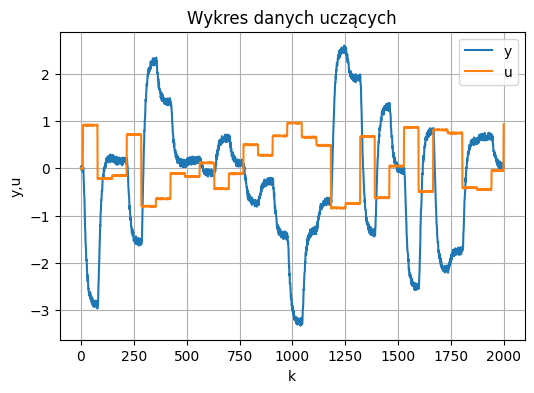

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(dane_ucz[:,1], label='y')
plt.plot(dane_ucz[:,0], label='u')
plt.title('Wykres danych uczących')
plt.xlabel('k')
plt.ylabel('y,u')
plt.legend()
plt.grid(True)
path='wykresy_dyn/dane_uczace.png'
plt.savefig(path,dpi=300)
plt.show()

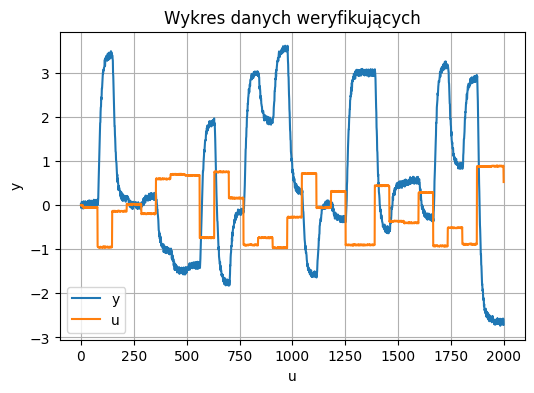

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(dane_wer[:,1], label='y')
plt.plot(dane_wer[:,0], label='u')
plt.title('Wykres danych weryfikujących')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
path='wykresy_dyn/dane_weryfikujace.png'
plt.savefig(path,dpi=300)
plt.show()

# Dynamiczny model liniowy metodą najmniejszych kwadratów


In [45]:
N=3

## Wyznaczanie parametrów

In [46]:
a=np.zeros((N,N))
b=np.zeros((N,N))

for n in range(1,N+1):
    a_temp, b_temp = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],n)
    b[0:n,n-1]=b_temp
    a[0:n,n-1]=a_temp
print(b)
print(a)


[[-0.12419175 -0.01768592 -0.01784741]
 [ 0.         -0.14997036 -0.03261511]
 [ 0.          0.         -0.13319526]]
[[0.95342143 0.62629191 0.5993733 ]
 [0.         0.31123454 0.32164576]
 [0.         0.         0.0099563 ]]


# Wykresy

## Dane uczące bez rekurencji

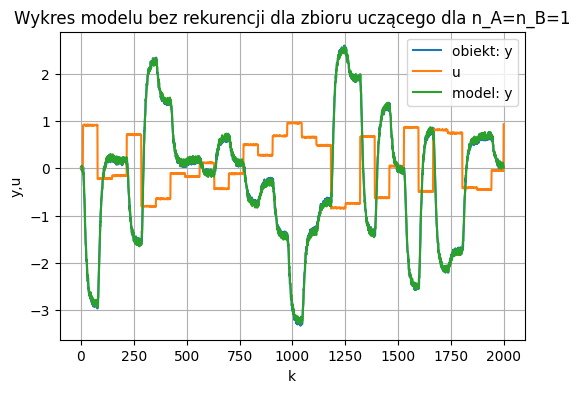

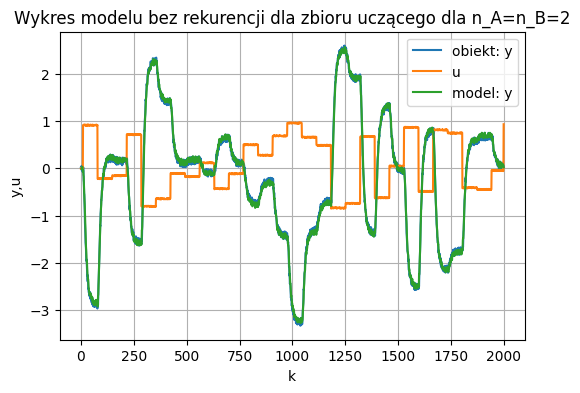

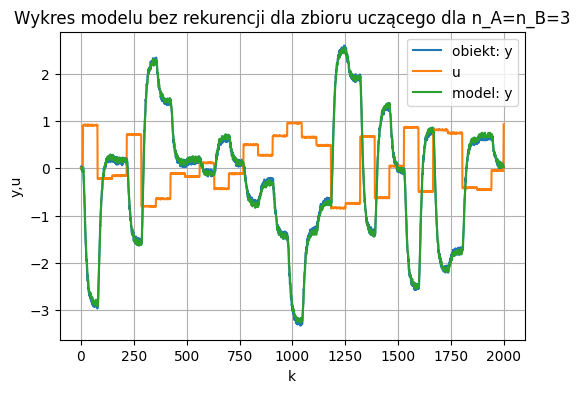

In [47]:
for n in range(1, N+1):  
    plt.figure(figsize=(6, 4))
    plt.plot(dane_ucz[:,1], label='obiekt: y')
    plt.plot(dane_ucz[:,0], label='u')
    k_vals=np.array(range(N,dane_ucz.shape[0]))
    plt.plot(k_vals, nlin_mod_dyn_y(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],k_vals,N), label='model: y')
    
    plt.title('Wykres modelu bez rekurencji dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_uczace_bez_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

## Dane uczące z rekurencją

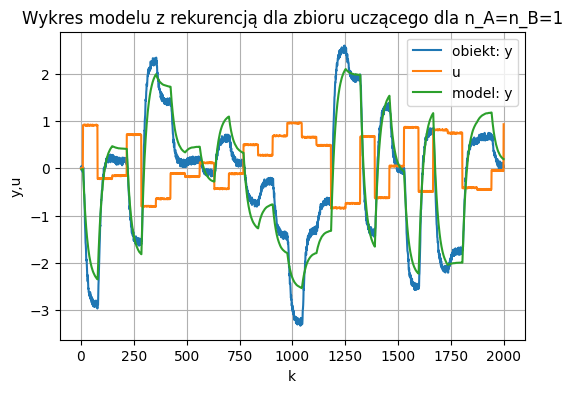

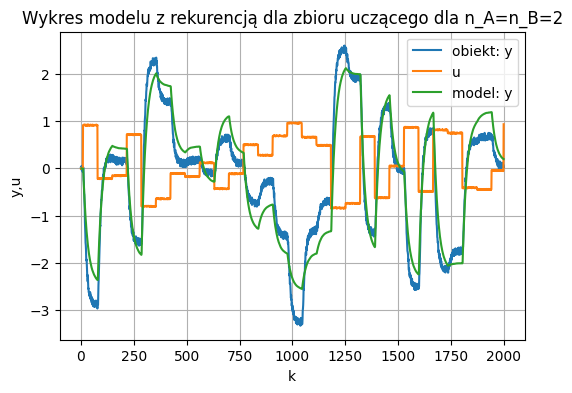

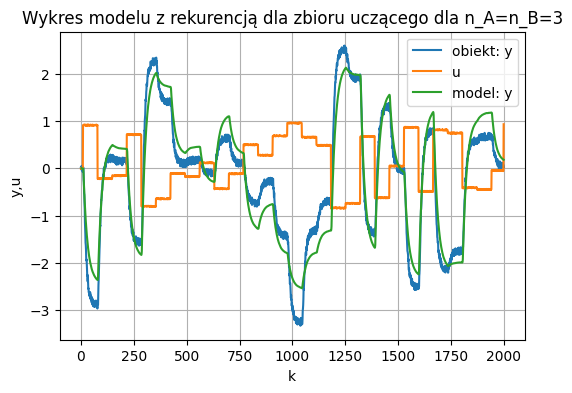

In [48]:
for n in range(1, N+1):
    plt.figure(figsize=(6, 4))
    plt.plot(dane_ucz[:,1], label='obiekt: y')
    plt.plot(dane_ucz[:,0], label='u')
    k_vals=np.array(range(N,dane_ucz.shape[0]))
    y_mod=nlin_mod_dyn_rek_y(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],k_vals, N)
    plt.plot(k_vals, y_mod[N:,0], label='model: y')
    plt.title('Wykres modelu z rekurencją dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_uczace_z_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

## Dane weryfikujące bez rekurencji

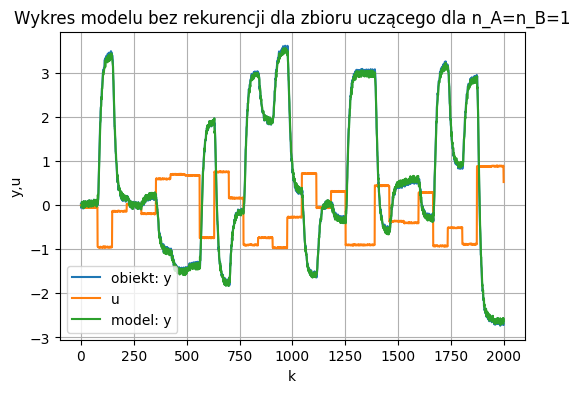

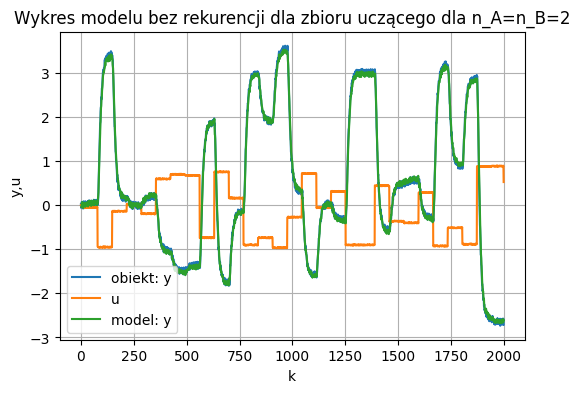

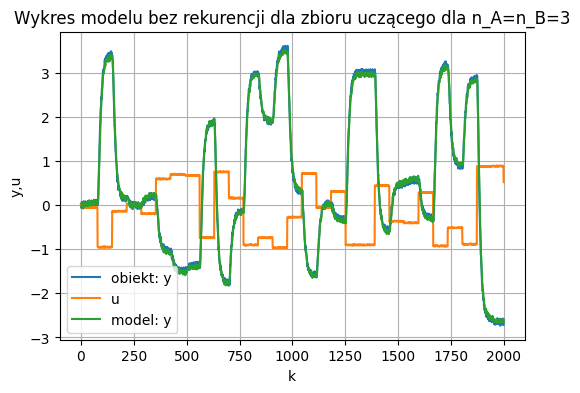

In [49]:
for n in range(1, N+1):
    plt.figure(figsize=(6, 4))
    plt.plot(dane_wer[:,1], label='obiekt: y')
    plt.plot(dane_wer[:,0], label='u')
    k_vals=np.array(range(N,dane_wer.shape[0]))
    plt.plot(k_vals, nlin_mod_dyn_y(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],k_vals,N), label='model: y')
    plt.title('Wykres modelu bez rekurencji dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_weryf_bez_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

## Dane weyfikujące z rekurencją

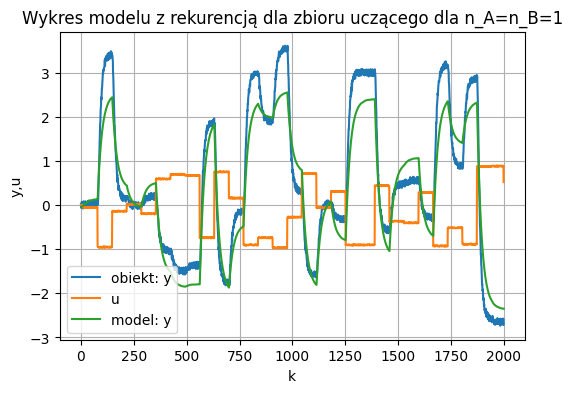

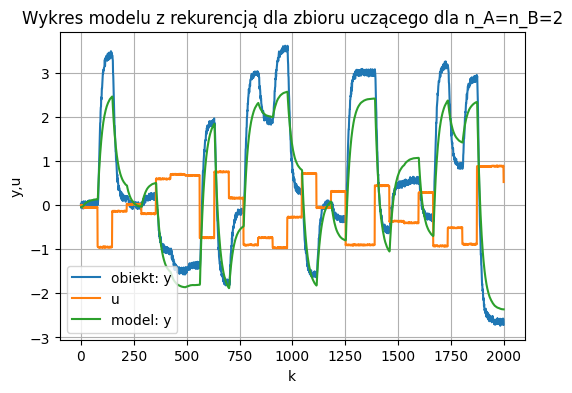

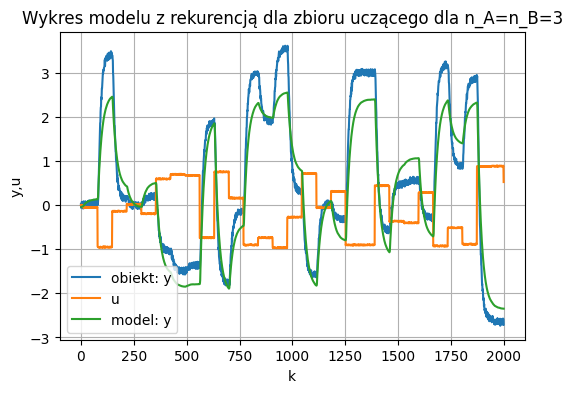

In [50]:
for n in range(1, N+1):
    plt.figure(figsize=(6, 4))
    plt.plot(dane_wer[:,1], label='obiekt: y')
    plt.plot(dane_wer[:,0], label='u')
    k_vals=np.array(range(N,dane_wer.shape[0]))
    y_mod=nlin_mod_dyn_rek_y(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],k_vals, N)
    plt.plot(k_vals, y_mod[N:,0], label='model: y')
    plt.title('Wykres modelu z rekurencją dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_weryf_z_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=300)
    plt.show()

## Obliczanie błędów

In [53]:
error_ucz = np.zeros((N,1))
error_wer = np.zeros((N,1))
error_ucz_rek = np.zeros((N,1))
error_wer_rek = np.zeros((N,1))
for n in range(N):
    error_ucz[n, 0] = model_dyn_error(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],N,nlin_mod_dyn_y)
    error_wer[n, 0] = model_dyn_error(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],N,nlin_mod_dyn_y)
    error_ucz_rek[n, 0] = model_dyn_error(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],N,nlin_mod_dyn_rek_y)
    error_wer_rek[n, 0] = model_dyn_error(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],N,nlin_mod_dyn_rek_y)

errors=np.array([range(1,N+1)]).T
errors=np.column_stack((errors,error_ucz))
errors=np.column_stack((errors,error_ucz_rek))
errors=np.column_stack((errors,error_wer))
errors=np.column_stack((errors,error_wer_rek))

header = "Stopień wielomianu,Dane uczące,Dane weryfikujące"
np.savetxt("wyniki_csv/bledy_mod_dyn_lin.csv", errors, delimiter=",", header=header, comments='', fmt='%d, %.2f, %.2f, %.2f, %.2f')
print(errors)

[[1.00000000e+00 3.73239353e+03 7.46483403e+06 6.09928960e+03
  1.21987594e+07]
 [2.00000000e+00 1.13243689e+01 1.40007214e+07 1.20419936e+01
  1.92741827e+07]
 [3.00000000e+00 9.88988629e+00 1.41153199e+07 1.12821910e+01
  1.93995058e+07]]
